In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [2]:
df = pd.read_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\Feature_Selection\yeosu_weather_selected.csv")
df.head()


,Day,Maximum Temperature (°C),Minimum Temperature (°C),Atmospheric Pressure (hPa),Relative Humidity (%),Precipitation (mm),Visibility (km),Wind Speed (km/h),Max Sustained Wind (km/h),Month,...,AvgTemp_lag7_FE,Humidity_lag1_FE,Pressure_diff_FE,AvgTemp_7d_mean_FE,AvgTemp_7d_std_FE,Precip_7d_sum_FE,Temp_Humidity_FE,Temp_Wind_FE,HotDay_FE,Average Temperature (°C)
0,1,8.1,1.2,1021.9,60.0,0.693147,2.580217,11.3,3.072693,1,...,0.614286,60.0,-1.4,0.614286,1.667557,0.693147,318.0,5.703416,0.693147,5.3
1,2,7.5,0.9,1020.5,47.0,0.693147,2.397895,28.3,3.860730,1,...,0.614286,60.0,-1.4,0.614286,1.667557,0.693147,188.0,5.867034,0.693147,4.0
2,3,6.9,0.8,1023.7,24.0,0.693147,3.034953,21.3,3.475067,1,...,0.614286,47.0,3.2,0.614286,1.667557,0.693147,62.4,5.688263,0.693147,2.6
3,4,2.0,-4.7,1024.1,24.0,0.693147,2.970414,27.2,3.770459,1,...,0.614286,24.0,0.4,0.614286,1.667557,0.693147,-16.8,5.397982,0.693147,-0.7
4,5,0.7,-5.5,1024.7,31.0,0.693147,2.944439,25.9,3.637586,1,...,0.614286,24.0,0.6,0.614286,1.667557,0.693147,-83.7,5.136210,0.693147,-2.7


In [3]:
X = df.drop(columns=['Average Temperature (°C)'])
y = df['Average Temperature (°C)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'SVR': SVR()
}


In [5]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}

results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
results_df


,RMSE,R2
GradientBoosting,0.471761,0.996945
RandomForest,0.476725,0.996881
LinearRegression,0.502904,0.996529
Ridge,0.502928,0.996528
ElasticNet,0.654713,0.994116
DecisionTree,0.700462,0.993265
Lasso,0.714160,0.992999
SVR,2.234215,0.931484


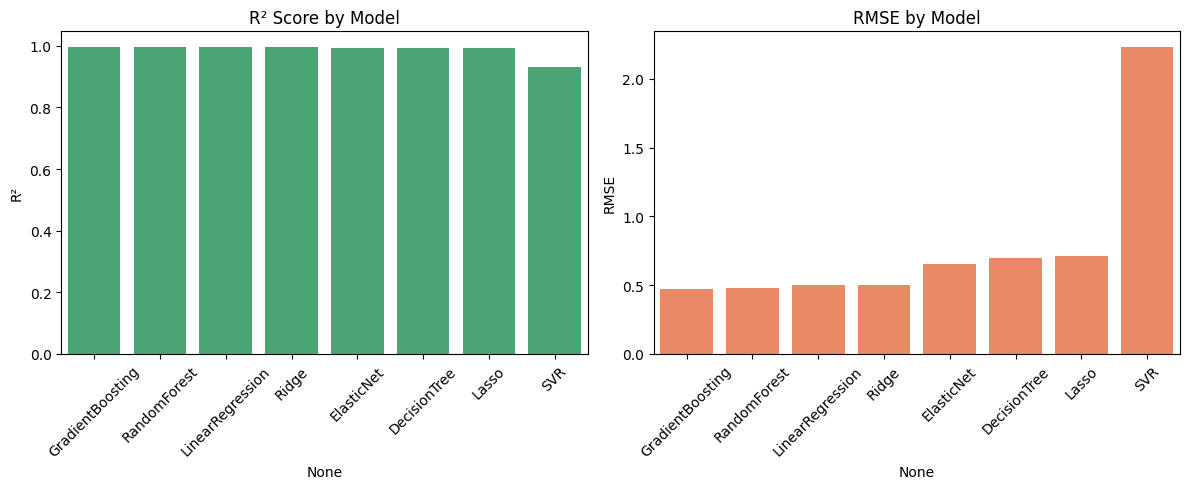

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=results_df.index, y=results_df['R2'], color='mediumseagreen')  # single color
plt.xticks(rotation=45)
plt.title('R² Score by Model')
plt.ylabel('R²')

plt.subplot(1,2,2)
sns.barplot(x=results_df.index, y=results_df['RMSE'], color='coral')  # single color
plt.xticks(rotation=45)
plt.title('RMSE by Model')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()
